<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Decision Tree

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Decision Tree**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Decision Tree](https://youtu.be/JUGo1Pu3QT4?si=ebQXv6Yglar0mYWp)
* [Random Forest](https://youtu.be/m5_wk310fho?si=up-mzVPHvniXsYE6)
* [Gradient Boosting](https://youtu.be/___T8_ixIwc?si=ozHR_eIuMF3SPTxJ)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

Decision trees are not the most powerful, cutting edge method in machine learning, so why cover decision trees?

* one of the most understandable, interpretable predictive machine learning models
  
* decision trees are enhanced with random forests, bagging and boosting to be one of the best machine learning predictive models in many cases

<figure style="text-align: center;">
  <img src="_static/decision_tree/blackspruce.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> A single proud black spruce tree within the Boreal Forest in Alaska, similar to the northern region of my home province of Alberta. Crop of photo from https://www.britannica.com/plant/spruce#/media/1/561445/8933, access date May 1, 2025. 
</figcaption>
</figure>

Let's cover some key aspects of decision trees.


#### Model Formulation

The prediction feature space is partitioned into $J$ exhaustive, mutually exclusive regions $R_1, R_2, \ldots, R_J$. For a given prediction case $x_1,\ldots,x_m \in R_j$, the prediction is:

**Regression** - the average of the training data in the region, $R_j$

$$
\hat{y} = \frac{1}{|R_j|} \sum_{\mathbf{x}_i \in R_j} y_i
$$

where $\hat{y}$ is the predicted value for input $\mathbf{x}$, $R_j$ is the region (leaf node) that $\mathbf{x}$ falls into, $|R_j|$ is the number of training samples in region $R_j$, and $y_i$ is the actual target values of those training samples in $R_j$.

**Classification** - category with the plurality of training cases (most common case) in region $R_j$:

$$
\hat{y} = \arg\max_{c \in C} \left( \frac{1}{|R_j|} \sum_{\mathbf{x}_i \in R_j} \mathbb{1}(y_i = c) \right)
$$

where $C$ is the set of all possible categories, $\mathbb{1}(y_i = c)$ is indicator transform, 1 if $y_i = c$, 0 otherwise, $|R_j|$ is the number of training samples in region $R_j$, and $\hat{y}$ is the predicted class label.

The predictor space, $𝑋_1,\ldots,𝑋_𝑚$, is segmented into $J$ mutually exclusive, exhaustive regions, $R_j, j = 1,\ldots,J$, where the regions are,

* **mutually exclusive** – any combination of predictor features, $x_1,\ldots,x_𝑚$, only belongs to a single region, $R_j$ 
  
* **exhaustive** – all combinations of predictor feature values belong a region, $R_j$, i.e., all the regions, $R_j, j = 1,\ldots,J$, cover entire predictor  feature space

All prediction cases, $x_1,\ldots,x_m$ that fall in the same region, $R_j$, are estimated with the same value.

* the prediction model inherently discontinuous at the region boundaries

For example, consider this decision tree prediction model for the production response feature, $\hat{Y}$ ̂from porosity, $X_1$, predictor feature,

<figure style="text-align: center;">
  <img src="_static/decision_tree/regions.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Four region decision tree with data and predictions, \(\hat{Y}(R_j) = \overline{Y}(R_j)\) by region, \(R_j, j=1,…,4\). For example, given a predictor feature value of 13% porosity, the model predicts about 2,000 MCFPD for production.
</figcaption>
</figure>

How do we segment the predictor feature space? 

Look at this example with predictor features porosity and brittleness to predict the production response feature. 

<figure style="text-align: center;">
  <img src="_static/decision_tree/complexboundaries.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> A very complicated segmentation of the predictor feature space with 3 regions.
</figcaption>
</figure>

* these are very efficient boundaries that would capture low, mid and high production

But, this model would be quite complicated, 

* requiring a large number of model parameters

* difficult to train for a large number of prediction features, i.e., high dimensionality

If I can convince you to accept these regions instead, then you would have a model that,

* is very easy to train

* has very few parameters

* very compact and interpretable

<figure style="text-align: center;">
  <img src="_static/decision_tree/simpleboundaries.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> A simpler segmentation of the predictor feature space with 9 regions, but much fewer parameters and easy to train for any dimensionality.
</figcaption>
</figure>

This is a set of regions based on hierarchical, binary segmentation. Let's clarify the concept of predictor feature space and then explain this form of predictor feature segmentation.

#### Predictor Feature Space

Let's step back and establish the concept of predictor feature space. We define it as,

* the space that includes all possible estimation problems, i.e., the combination of all possible predictor feature values, $x_1, x_2,\ldots,x_m$.

<figure style="text-align: center;">
  <img src="_static/decision_tree/predictorspace.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Illustration of predictor feature space for the case of 3 predictor features with specified minimum and maximum values per feature resulting in a rectangular cuboid of possible predictions, $x_1, x_2, x_3$.
</figcaption>
</figure>

Typically this is defined by the range of possible values, $x_{\alpha} \in \left[X_{\alpha,\text{𝑚𝑖𝑛}},𝑋_{\alpha,\text{max}} \right]$​, resulting in,

* 1 predictor feature $\rightarrow$ line segment

* 2 predictor features $\rightarrow$ rectangle

* 3 predictor features $\rightarrow$ rectangular cuboid

* $>$3 predictor features $\rightarrow$ hyperrectangle

While we define the predictor feature space with the ranges of the predictor features, I should provide a cautionary note.

```{admonition} Decision Trees have an Implicit Extrapolation Model
:class: remove-from-content-only

As you will see below, the regions along the exterior extend to infinity, effectively assuming a constant extrapolation model.
```

#### Tree Loss Functions 

For regression trees we minimize the residual sum of squares and for classification trees we minimize the weighted average Gini impurity.

The Residual Sum of Squares (RSS) measures the total squared difference between the actual values and predicted values in a regression tree,

$$
\text{RSS} = \sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

where $J$ is the total number of regions in the tree, $R_j$ is the $j$ region, $y_i$ is the truth value of the response feature at observation the $i$ training data, and $\hat{y}_{R_j}$ is the predicted value for region $R_j$, the mean of $y_i \; \forall \; i \in R_j$.

When a parent node splits into two child nodes \( t_L \) and \( t_R \), the weighted Gini impurity is:

$$
\text{Gini}_{\text{total}} = \sum_{j=1}^{J} \frac{N_j}{N} \cdot \text{Gini}(j)
$$

where $J$ is the total number of regions in the tree, $N$ is the total number of samples in the dataset,   $N_j$ is the number of samples in leaf node $j$, and $\text{Gini}(j)$ is the Gini impurity of leaf node $j$.

The Gini impurity for a single decision tree node is calculated as,

$$
\text{Gini}(j) = 1 - \sum_{c=1}^{C} p_{j,c}^2
$$

where $p_{j,c}$ is the proportion of class $c$ samples in node $j$.

For classification our loss function does not compare the predictions to the truth values like our regression loss! 

* the Gini impurity penalizes mixtures of training data categories! A region of all one category of training data will have a Gini impurity of 0 to contribute to the over all loss.

Note that the by-region Gini impurity is,

* **weighted** - by the number of training data in each regions, regions with more training data have greater impact on the overall loss

* **averaged** - over all the regions to calculate the total Gini impurity of the decision tree

These losses are calculated during,

* **tree model training** - with respect to training data to grow the tree

* **tree model tuning** - with respect to withheld testing data to select the optimum tree complexity.

Let's talk about tree model training first and then tree model tuning.

#### Training the Tree Model

How do we calculate these mutually exclusive, exhaustive regions? This is accomplished through hierarchical binary segmentation of the predictor feature space.

Training a decision tree model is both,

1. assigning the mutual exclusive, exhaustive regions

2. building a decision tree, each region is a terminal node, also known as a leaf node

These are the same thing! Let's list the steps and then walk through a training a tree to demonstrate this.

0. **Assign All Data to a Single Region** - this region covers the entire predictor feature space

1. **Scan All Possible Splits** - over all regions and over all features

2. **Select the Best Split** - this is greedy optimization, i.e., the best split minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

3. **Iterate Until Very Overfit** - return to step 1 for the next split until the tree is very overfit.

Note, this method for training a decision tree is a solution heuristic,

* there is no effort to jointly optimize all splits at once, for example, to select a suboptimal split to maximize training error reduction with a subsequent split
  
Also, the decision tree is constructed from the top down. 

* we begin with a single region that covers the entire predictor feature space and then proceed with a sequence of region splits / tree branches.

Now let's illustrate this with an example, predicting natural gas production response feature with 2 predictor features,

* porosity - impacting pore volume and flow

* brittleness - impacting the ability to induce and hold open fractures

We start with all our predictor feature space in a single region with the single possible prediction as the average of all the training data.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_1nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Initial data all in 1 region, i.e., hyperparameter number of leaf nodes of 1, predict with the global mean of the response feature.
</figcaption>
</figure>

Next, we scan all features to find the first best split, porosity of 16.7%. This very simple decision tree with a single decision node and 2 regions or leaf nodes is known as a stump tree, i.e., the simplest possible decision tree model.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_2nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 2,  first best split resulting in a stump tree.
</figcaption>
</figure>

Now we scan over both regions and over all predictor features to find the best next split, brittleness of 36.1 in the greater than or equal to porosity of 16.7% region. 

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_3nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 3.
</figcaption>
</figure>

Continuing, we find our next split of porosity of 18.5% in the upper right region. We now have 4 regions. Our decision tree is starting to capture the increasing production with increasing porosity along with lower production for low brittleness.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_4nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 4.
</figcaption>
</figure>

Now the next best split is in the original lower porosity region from the stump tree with porosity of 13.2%.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_5nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 5.
</figcaption>
</figure>

The next best split divides the region in the middle of porosity, capturing the trend of low production for low brittleness, even with high porosity.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_6nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 6.
</figcaption>
</figure>

The next split is capturing the reduction in production with high brittleness, even with high porosity,

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_7nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 7.
</figcaption>
</figure>

and this split continues to capture this same pattern in the data.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tree_8nodes.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Hyperparameter number of leaf nodes of 8.
</figcaption>
</figure>

For brevity we stop here, and make these observations,

* hierarchical, binary segmentation is the same as sequentially building a decision tree, each split adds a new decision node and increases the number of leaf nodes by one.

* the simple decision trees are in the complicated decision tree, i.e., if we build an $8$ leaf node model, we have the $8, 7, \ldots, 2$ leaf node model by sequentially removing the decision nodes, in the order of last one is the first one to remove.

* the ultimate overfit model is number of leaf nodes equal to the number of training data. In this case, the training error is 0.0 as have one region for each training data a we estimate with the training data response feature values for all the at the training data cases.

#### Updating the Loss Function with a New Split

To find the next best split, we must scan over all regions, and over all features with the regions. This may sound like a lot of computation, but it is quite efficient.

* we only need to check the midpoints between sorted training data for each feature in each region, because any split that does not change the region assignment of a training data will not change the training loss.

For a region $R$ split into candidate regions $R_L$ and $R_R$, the RSS after the split is:

$$
\text{RSS}_{\text{split}} = \sum_{i \in R_L} (y_i - \hat{y}_{R_L})^2 + \sum_{i \in R_R} (y_i - \hat{y}_{R_R})^2
$$

where, $y_i$ is the actual response feature for training data observation $i$, and $\hat{y}_{R_L}$, $\hat{y}_{R_R}$ is the mean of training data response feature in candidate regions $R_L$ and $R_R$.  

Note, we add in the RSS components from all the other regions to get the total model RSS to find the best split over all the regions,

* the split with the lowest $\text{RSS}_{\text{split}}$ is selected for the region and compared to all other best splits in the other regions to find the next best split, greedy solution.

Now we are prepared for tuning a decision tree model.

#### Tuning the Tree Model

To tune the decision tree we take the very overfit trained tree model,

* sequentially cut the last decision node

* i.e., prune the last branch of the decision tree

Since the simpler trees are inside the complicated tree!

We can calculate test error as we prune and select tree with minimum test error

We overfit the decision tree model, with a large number of leaf nodes and then we reduce the number of leaf nodes while tracking the test error.

* we select the number of leaf nodes that minimize the testing error.

* since we are sequentially removing the last branch to simplify the tree, we call model tuning **pruning** for decision trees

Here is an overfit decision tree with many, $100$, leaf nodes. 

<figure style="text-align: center;">
  <img src="_static/decision_tree/veryoverfit.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, hyperparameter number of leaf nodes of 100 (left), train and test cross validation plot (center) and train and test error over number of leaf nodes (right).
</figcaption>
</figure>

Since this tree is calculated with my interactive Python dashboard, I am able to easily reduce the number of regions from $100, 99, 98, 96, 95, \ldots$ and visualize the tree to explore complicated to simple trees. 

* by doing this we can demonstrate that the simple trees are in the complicated tree.

For example, here's the 5 region decision tree in the overfit 100 region decision tree,

<figure style="text-align: center;">
  <img src="_static/decision_tree/5nodetree.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> The 5 leaf node tree in the very overfit 100 leaf node tree model.
</figcaption>
</figure>

and here is the 10 region decision tree in the overfit 100 region decision tree,

<figure style="text-align: center;">
  <img src="_static/decision_tree/10nodetree.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> The 10 leaf node tree in the very overfit 100 leaf node tree model.
</figcaption>
</figure>

and finally, here is the 20 region decision tree in the overfit 100 region decision tree,

<figure style="text-align: center;">
  <img src="_static/decision_tree/20nodetree.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> The 20 leaf node tree in the very overfit 100 leaf node tree model.
</figcaption>
</figure>

You might wonder, why I didn't just update the decision tree plot? scikit-learn's decision tree plotting function recales the plot and the geometry changes so much it is not easy to visualize the simple trees within the complicated tree.

* I think this approach of visualizing the simple trees and drafting the polylines works well for educational purposes!

Now let's return to our very overfit tree and demonstrate the hyperparameter tuning by tree pruning approach,

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune100.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

Now, we identify the last added branch and remove it to calculate the 99 region decision tree, a slightly simpler decision tree, and we calculate the test error.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune99.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

And we identify the last added branch again and remove it to calculate the 98 region decision tree, once again a slightly simpler decision tree, and we calculate the test error.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune98.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

And we identify the last added branch again and remove it to calculate the 97 region decision tree, once again a slightly simpler decision tree, and we calculate the test error.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune97.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

And we identify the last added branch again and remove it to calculate the 96 region decision tree, once again a slightly simpler decision tree, and we calculate the test error.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune96.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

And we identify the last added branch again and remove it to calculate the 95 region decision tree, once again a slightly simpler decision tree, and we calculate the test error.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune95.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

And we identify the last added branch again and remove it to calculate the 94 region decision tree, once again a slightly simpler decision tree, and we calculate the test error.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tune94.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, train and test error vs. model complexity (left) and decision tree (right).
</figcaption>
</figure>

Now let's return and look at the very overfit model and add some more information over different levels of complexity.

<figure style="text-align: center;">
  <img src="_static/decision_tree/overfit.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Very overfit decision tree, hyperparameter number of leaf nodes of 100 (left), train and test cross validation plot (center) and train and test error over number of leaf nodes (right).
</figcaption>
</figure>

I include the,

* train and test cross validation plot with nearly perfect training prediction and very poor testing prediction for the 100 leaf node overfit decision tree

* train and test error versus number of leaf nodes.

This demonstrates that the decision tree model is indeed very overfit, for example, see the falling training error and rising testing error.

Now we prune the decision nodes until we obtain the model with the minimum testing error at about 19 leaf nodes.

<figure style="text-align: center;">
  <img src="_static/decision_tree/tuned.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Tuned decision tree, hyperparameter number of leaf nodes of 20 (left), train and test cross validation plot (center) and train and test error over number of leaf nodes indicating that testing error is minimized (right).
</figcaption>
</figure>

For completeness, I have included an underfit model, i.e., if we prune our decision tree too much, with only 8 leaf nodes.

<figure style="text-align: center;">
  <img src="_static/decision_tree/underfit.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Underfit decision tree, hyperparameter number of leaf nodes of 8 (left), train and test cross validation plot (center) and train and test error over number of leaf nodes indicating that testing error is minimized (right).
</figcaption>
</figure>

Note, that the train and test error are both very high with the underfit decision tree.

I prefer number of leaf nodes as my decision tree hyperparameter because it provides,

* **continuous, uniform increase in complexity** -  equal steps in increased complexity without jumps

* **intuitive control on complexity** - we can understand and relate the $2, 3, \ldots, 100$ leaf node decision trees

* **flexible complexity** - the tree is free to grow in any manner to reduce training error, including highly asymmetric decision trees

There are other common decision tree hyperparameters including,

* **Minimum reduction in RSS** – related to the idea that incremental increase in complexity must be offset by sufficient reduction in training error. This could stop the model early, for example, a split with low reduction in training error could lead to a subsequent split with a much larger reduction in training error

* **Minimum number of training data in each region** – related to the concept of accuracy of the by-region estimates, i.e., we need at least $n$ data for a reliable mean and most common category

* **Maximum number of levels** – forces symmetric trees, similar number of splits to get to each leaf node. There is a large change in model complexity with change in the hyperparameter.


#### The Prediction Model 

The decision tree prediction model is represented as **set of nested if statements**, for example:

```python
if porosity > 0.15:
    if brittleness < 20:
        initial_production = 1000
    else:
        initial_production = 7000
else:
    if brittleness < 40:
        initial_production = 500
    else:
        initial_production = 3000
```

and the predictions as stated above are either the,

* regression - average of the training data in the region

* classification - the plurality, most common category, of the training data in the region

#### Shapley Values from Decision Trees

Recall, we need to take a single model, for example, $f(x_1,x_2,x_3,x_4)$, and make an estimate for all possible combinations of feature subsets, for example, 

$$
f(x_1) \quad f(x_2,x_4) \quad f(x_1,x_2,x_3)
$$

* note, the naïve approach to calculate Shapley values is to train the full combinatorial of models with different predictor features, but we don’t want to make new models if our goal is feature importance to diagnose our specific model, $f$, to support model explainability.

One solution is to apply a variety of approaches, similar to imputation methods, including,

* replace the excluded feature(s) with the expected value, global mean,

$$
f(x_1,x_2,x_3) = f(x_1,x_2,x_3,x_4=E[x_4])
$$

* replace the excluded feature(s) with the median value, the 50th percentile,

$$
f(x_1,x_2,x_3) = f(x_1,x_2,x_3,x_4=P50_{x_4})
$$

There is a more accurate, unique method with tree-based models, we can actually remove the influence of any of the features from the decision tree after the model is trained, for example, 

* remove all $x_4$ branches, and then the model does not use $x_4$ to make the prediction

Of course, we cannot just remove branches and 'wood glue' the tree back together!

* we must make new predictions that don't introduce bias.

Let's demonstrate the procedure for removing a feature from a decision tree, with a couple of prediction cases,

1. Here is a prediction case that does not encounter the removed feature, $x_2$ is removed and,

$$
x_1=25
$$

* the prediction is made as usual.

<figure style="text-align: center;">
  <img src="_static/decision_tree/shaptree1.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Prediction case that does not encounter the removed feature is made as usual.
</figcaption>
</figure>

$$
f(x_1=25) = 20
$$

2. A prediction case that does encounter the removed feature, $x_1$ is removed and,

$$
x_2 = 60
$$

* we effectively go down both paths, by weighting, by number of training data, the solution over both paths!

<figure style="text-align: center;">
  <img src="_static/decision_tree/shaptree2.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Prediction case that does encounter the removed feature is made by weighting both paths by the number of training data.
</figcaption>
</figure>

$$
f(x_2=60) = \frac{60}{100} \left[ \frac{15}{60} \times 20 + \frac{45}{60} \times 70 \right] + \frac{40}{100} \left[130\right] = 86.5
$$

$$
f(x_2=60) = 86.5
$$


#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline                                         
suppress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn import tree                                      # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                                # for accessing tree information
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.tree import export_graphviz                      # graphical visualization of trees
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV,KFold) # model tuning
from sklearn.pipeline import (Pipeline,make_pipeline)         # machine learning modeling pipeline
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [2]:
def comma_format(x, pos):
    return f'{int(x):,}'

def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal); m = len(pred) + 1
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])
    
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def plot_CDF(data,color,alpha=1.0,lw=1,ls='solid',label='none'):
    cumprob = (np.linspace(1,len(data),len(data)))/(len(data)+1)
    plt.scatter(np.sort(data),cumprob,c=color,alpha=alpha,edgecolor='black',lw=lw,ls=ls,label=label,zorder=10)
    plt.plot(np.sort(data),cumprob,c=color,alpha=alpha,lw=lw,ls=ls,zorder=8)

def extract_rules(tree_model, feature_names):                 # recursive method to extract rules, from paulkernfeld Stack Overflow (?)
    rules = []
    def traverse(node, depth, prev_rule):
        if tree_model.tree_.children_left[node] == -1:        # Leaf node
            class_label = np.argmax(tree_model.tree_.value[node])
            rule = f"{prev_rule} => Class {class_label}"
            rules.append(rule)
        else:  # Split node
            feature = feature_names[tree_model.tree_.feature[node]]
            threshold = tree_model.tree_.threshold[node]
            left_child = tree_model.tree_.children_left[node]
            right_child = tree_model.tree_.children_right[node]
            traverse(left_child, depth + 1, f"{prev_rule} & {feature} <= {threshold}") # Recursively traverse left and right subtrees
            traverse(right_child, depth + 1, f"{prev_rule} & {feature} > {threshold}")
    traverse(0, 0, "Root")
    return rules

def plot_decision_tree_regions(tree_model, feature_names,X_min,X_max,annotate=True):
    rules = extract_rules(tree_model, feature_names)
    for irule, ____ in enumerate(rules):
        rule = rules[irule].split()[2:]
        X_min = Xmin[0]; X_max = Xmax[0]; Y_min = Xmin[1]; Y_max = Xmax[1];
        index = [i for i,val in enumerate(rule) if val==feature_names[0]]
        for i in index:
            if rule[i+1] == '<=':
                X_max = min(float(rule[i+2]),X_max)
            else:
                X_min = max(float(rule[i+2]),X_min)
        index = [i for i,val in enumerate(rule) if val==feature_names[1]]
        for i in index:
            if rule[i+1] == '<=':
                Y_max = min(float(rule[i+2]),Y_max)
            else:
                Y_min = max(float(rule[i+2]),Y_min) 
        plt.gca().add_patch(plt.Rectangle((X_min,Y_min),X_max-X_min,Y_max-Y_min, lw=2,ec='black',fc="none"))
        cx = (X_min + X_max)*0.5; cy = (Y_min + Y_max)*0.5; loc = np.array((cx,cy)).reshape(1, -1)
        if annotate == True:
            plt.annotate(text = str(f'{np.round(tree_model.predict(loc)[0],2):,.0f}'),xy=(cx,cy),ha='center',
                         weight='bold',c='white',zorder=100)

def visualize_tree_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,
                         ymax,title,Xname,yname,Xlabel,ylabel,annotate=True):# plots the data points and the decision tree prediction 
    cmap = plt.cm.inferno
    X1plot_step = (Xmax[0] - Xmin[0])/300.0; X2plot_step = -1*(Xmax[1] - Xmin[1])/300.0 # resolution of the model visualization
    XX1, XX2 = np.meshgrid(np.arange(Xmin[0], Xmax[0], X1plot_step), # set up the mesh
                     np.arange(Xmax[1], Xmin[1], X2plot_step))
    y_hat = model.predict(np.c_[XX1.ravel(), XX2.ravel()])    # predict with our trained model over the mesh
    y_hat = y_hat.reshape(XX1.shape)

    plt.imshow(y_hat,interpolation=None, aspect="auto", extent=[Xmin[0],Xmax[0],Xmin[1],Xmax[1]], 
        vmin=ymin,vmax=ymax,alpha = 0.2,cmap=cmap,zorder=1)
    sp = plt.scatter(X1_train,X2_train,s=None, c=y_train, marker='o', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.6, linewidths=0.3, edgecolors="black", label = 'Train',zorder=10)
    plt.scatter(X1_test,X2_test,s=None, c=y_test, marker='s', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.3, linewidths=0.3, edgecolors="black", label = 'Test',zorder=10)

    plot_decision_tree_regions(model,Xname,Xmin,Xmax,annotate)
    plt.title(title); plt.xlabel(Xlabel[0]); plt.ylabel(Xlabel[1])
    plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
    cbar = plt.colorbar(sp, orientation = 'vertical')         # add the color bar
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    cbar.set_label(ylabel, rotation=270, labelpad=20)
    return y_hat

def check_tree_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title): # plots the estimated vs. the actual  
    y_hat_train = model.predict(np.c_[X1_train,X2_train]); y_hat_test = model.predict(np.c_[X1_test,X2_test])

    df_cross = pd.DataFrame(np.c_[y_test,y_hat_test],columns=['y_test','y_hat_test'])
    df_cross_train = pd.DataFrame(np.c_[y_train,y_hat_train],columns=['y_train','y_hat_train'])

    plt.scatter(y_train,y_hat_train,s=15, c='blue',marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.7, 
                linewidths=0.3, edgecolors="black",label='Train',zorder=10)
    plt.scatter(y_test,y_hat_test,s=15, c='red',marker='s', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.7, 
                linewidths=0.3, edgecolors="black",label='Test',zorder=10)

    unique_y_hat_all = set(np.concatenate([y_hat_test,y_hat_train]))
    for y_hat in unique_y_hat_all:
        plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.2,ls='--',zorder=1)
        
    unique_y_hat_test = set(y_hat_test)
    for y_hat in unique_y_hat_test:
        #plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.3,ls='--',zorder=1)
        cond_mean_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].mean()
        cond_P75_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].quantile(0.75)
        cond_P25_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].quantile(0.25)
        plt.scatter(cond_mean_y_hat,y_hat-0.02*(ymax-ymin),color='red',edgecolor='black',s=60,marker='^',zorder=100)
        plt.plot([cond_P25_y_hat,cond_P75_y_hat],[y_hat-0.025*(ymax-ymin),y_hat-0.025*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P25_y_hat,cond_P25_y_hat],[y_hat-0.032*(ymax-ymin),y_hat-0.018*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P75_y_hat,cond_P75_y_hat],[y_hat-0.032*(ymax-ymin),y_hat-0.018*(ymax-ymin)],c='black',lw=0.7)
        
    unique_y_hat_train = set(y_hat_train)
    for y_hat in unique_y_hat_train:
        #plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.3,ls='--',zorder=1)
        cond_mean_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].mean()
        cond_P75_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].quantile(0.75)
        cond_P25_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].quantile(0.25)
        plt.scatter(cond_mean_y_hat,y_hat+0.02*(ymax-ymin),color='blue',edgecolor='black',s=60,marker='v',zorder=100)
        plt.plot([cond_P25_y_hat,cond_P75_y_hat],[y_hat+0.025*(ymax-ymin),y_hat+0.025*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P25_y_hat,cond_P25_y_hat],[y_hat+0.032*(ymax-ymin),y_hat+0.018*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P75_y_hat,cond_P75_y_hat],[y_hat+0.032*(ymax-ymin),y_hat+0.018*(ymax-ymin)],c='black',lw=0.7)
        
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim([ymin,ymax]); plt.ylim([ymin,ymax]); plt.legend(loc='upper left')
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

    plt.arrow(ymin,ymin,ymax,ymax,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE_train = metrics.mean_squared_error(y_train,y_hat_train); MSE_test = metrics.mean_squared_error(y_test,y_hat_test)
    plt.gca().add_patch(plt.Rectangle((ymin+0.6*(ymax-ymin),ymin+0.1*(ymax-ymin)),0.40*(ymax-ymin),0.12*(ymax-ymin),
        lw=0.5,ec='black',fc="white",zorder=100))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.annotate('MSE Testing:  ' + str(f'{np.round(MSE_test,2):,.0f}'),(ymin+0.62*(ymax-ymin),ymin+0.18*(ymax-ymin)),zorder=1000)
    plt.annotate('MSE Training: ' + str(f'{np.round(MSE_train,2):,.0f}'),(ymin+0.62*(ymax-ymin),ymin+0.12*(ymax-ymin)),zorder=1000)
    
def tree_tuning(node_max,cnode,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title,seed):
    MSE_test_mat = np.zeros(node_max-1); MSE_train_mat = np.zeros(node_max-1);
    
    for imax_leaf_node, max_leaf_node in enumerate(range(2,node_max+1)):
        np.random.seed(seed = seed)
        tree_temp = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_node)
        tree_temp = tree_temp.fit(X_train.values, y_train.values)
        y_hat_train = tree_temp.predict(np.c_[X1_train,X2_train]); y_hat_test = tree_temp.predict(np.c_[X1_test,X2_test])  
        MSE_train_mat[imax_leaf_node] = metrics.mean_squared_error(y_train,y_hat_train)
        MSE_test_mat[imax_leaf_node] = metrics.mean_squared_error(y_test,y_hat_test)
        if max_leaf_node == cnode:
            plt.scatter(cnode,MSE_train_mat[imax_leaf_node],color='blue',edgecolor='black',s=20,marker='o',zorder=1000)
            plt.scatter(cnode,MSE_test_mat[imax_leaf_node],color='red',edgecolor='black',s=20,marker='o',zorder=1000)
    maxcheck = max(np.max(MSE_train_mat),np.max(MSE_test_mat))
    
    plt.vlines(cnode,0,maxcheck,color='black',ls='--',lw=1,zorder=1) 
    plt.plot(range(2,node_max+1),MSE_train_mat,color='blue',zorder=100,label='Train')
    plt.plot(range(2,node_max+1),MSE_test_mat,color='red',zorder=100,label='Test')
    
    plt.title(title); plt.xlabel('Maximum Number of Leaf Nodes'); plt.ylabel('Means Square Error')
    plt.xlim([0,node_max]); plt.ylim([0,maxcheck]); plt.legend(loc='upper right')
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def tree_to_code(tree, feature_names):                        # code from StackOverFlow by paulkernfeld
    tree_ = tree.tree_                                        # convert tree object to portable code to use anywhere
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}elif {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1) 

def get_lineage(tree, feature_names):                         # code from StackOverFlow by Zelanzny7
    left      = tree.tree_.children_left                      # track the decision path for any set of inputs
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     
    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
        lineage.append((parent, split, threshold[parent], features[parent]))
        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)
    for child in idx:
        for node in recurse(left, right, child):
            print(node) 

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [3]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).
* brittleness (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gas production (90 day average) (MCFPD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specify the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

#### Feature Engineering

Let's make some changes to the data to improve the workflow:

* **Select the predictor features (x2) and the response feature (x1)**, make sure the metadata is also consistent.
* **Metadata** encoding such as the units, labels and display ranges for each feature.
* **Reduce the number of data** for ease of visualization (hard to see if too many points on our plots).
* **Train and test data split** to demonstrate and visualize simple hyperparameter tuning.
* **Add random noise to the data** to demonstrate model overfit. The original data is error free and does not readily demonstrate overfit.

Given this is properly set, one should be able to use any dataset and features for this demonstration. 

* for brevity we don't show any feature selection here. Previous chapter, e.g., k-nearest neighbours include some feature selection methods, but see the feature selection chapter for many possible methods with codes for feature selection.

#### Optional: Add Random Noise to the Response Feature

We can do this to observe the impact of data noise on overfit and hyperparameter tuning.

* This is for experiential learning, of course we wouldn't add random noise to our data
* We set the random number seed for reproducibility

In [4]:
add_error = True                                              # add random error to the response feature
std_error = 500                                               # standard deviation of random error, for demonstration only
idata = 2

if idata == 1:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from my github repo
    df_load = df_load.sample(frac=.30, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    
elif idata == 2:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data 
    df_load = df_load.sample(frac=.70, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})
    
yname = 'Production'; Xname = ['Por','Brittle']               # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                         # set minimums and maximums for visualization 
ymin = 1000.0; ymax = 9000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production'    # specify the feature labels for plotting
Xunit = ['%','%']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df_load[yname] = df_load[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df_load)) # add noise
    values = df_load._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df_load[yname])                              # extract selected features as X and y DataFrames
X = df_load[Xname]
df = pd.concat([X,y],axis=1)                                  # make one DataFrame with both X and y (remove all other features)

Let's make sure that we have selected reasonable features to build a model
* the 2 predictor features are not collinear, as this would result in an unstable prediction model
* each of the features are related to the response feature, the predictor features inform the response 

#### Calculate the Correlation Matrix and Correlation with Response Ranking 

Let's start with correlation analysis. We can calculate and view the correlation matrix and correlation to the response features with these previously declared functions.
* correlation analysis is based on the assumption of linear relationships, but it is a good start

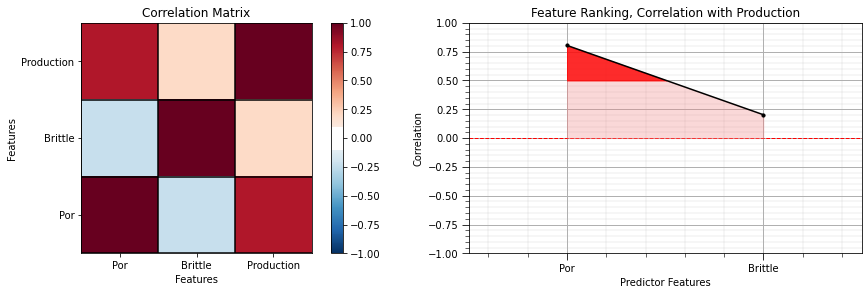

In [5]:
corr_matrix = df.corr()
correlation = corr_matrix.iloc[:,-1].values[:-1]

plt.subplot(121)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.1)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplot(122)
feature_rank_plot(Xname,correlation,-1.0,1.0,0.0,'Feature Ranking, Correlation with ' + yname,'Correlation',0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coefficients are limited to degree of linear correlations.  

* Let's look at the matrix scatter plot to see the pairwise relationship between the features.

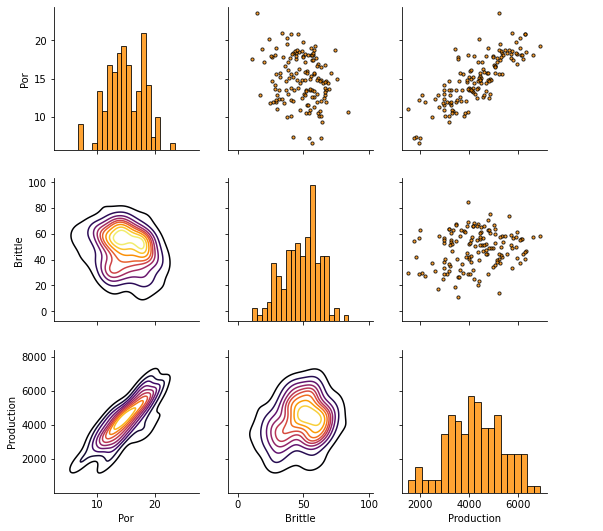

In [6]:
pairgrid = sns.PairGrid(df,vars=Xname+[yname])                # matrix scatter plots
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Train and Test Split

For convenience and simplicity we use scikit-learn's random train and test split.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=73073) # train and test split
df_train = pd.concat([X_train,y_train],axis=1)                # make one train DataFrame with both X and y (remove all other features)
df_test = pd.concat([X_test,y_test],axis=1)                   # make one testin DataFrame with both X and y (remove all other features)

#### Visualize the DataFrame

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [8]:
print('       Training DataFrame          Testing DataFrame')
display_sidebyside(df_train,df_test)                          # custom function for side-by-side DataFrame display

       Training DataFrame          Testing DataFrame


,Por,Brittle,Production
86,12.83,29.87,2089.258307
35,17.39,56.43,5803.596379
75,12.23,40.67,3511.348151
36,13.72,40.24,4004.849870
126,12.83,17.20,2712.836372
,Por,Brittle,Production
5,15.55,58.25,5353.761093
46,20.21,23.78,4387.577571
96,15.07,39.39,4412.135054
45,12.10,63.24,3654.779704


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The describe command provides count, mean, minimum, maximum in a nice data table. 

In [9]:
print('            Training DataFrame                      Testing DataFrame')    # custom function for side-by-side summary statistics
display_sidebyside(df_train.describe().loc[['count', 'mean', 'std', 'min', 'max']],df_test.describe().loc[['count', 'mean', 'std', 'min', 'max']])

            Training DataFrame                      Testing DataFrame


,Por,Brittle,Production
count,105.000000,105.000000,105.000000
mean,14.859238,48.861143,4238.554591
std,3.057228,14.432050,1087.707113
min,7.220000,10.940000,1517.373571
max,23.550000,84.330000,6907.632261
,Por,Brittle,Production
count,35.000000,35.000000,35.000000
mean,15.011714,46.798286,4378.913131
std,3.574467,13.380910,1290.216113
min,6.550000,20.120000,1846.027145


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

#### Visualize the Train and Test Splits

Let's check the consistency and coverage of training and testing with histograms and scatter plots.

* check to make sure the training and testing cover the range of possible feature combinations
* ensure we are not extrapolating beyond the training data with the testing cases

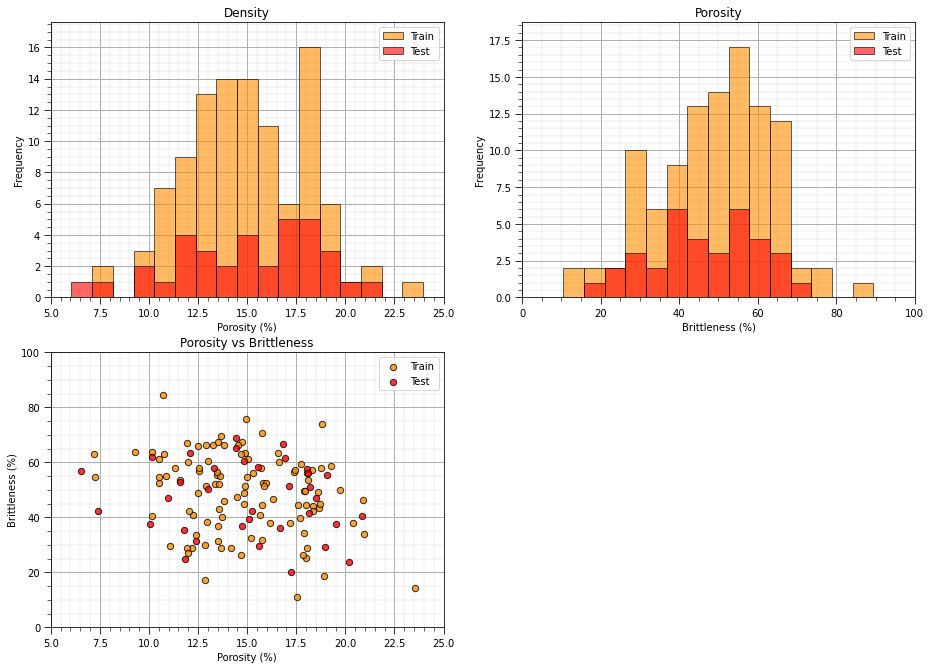

In [10]:
nbins = 20                                                    # number of histogram bins

plt.subplot(221)                                              # predictor feature #1 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Density'); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df_train[Xname[0]],df_train[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Sometimes I find it more convenient to compare distributions by looking at CDF's instead of histograms.
* we avoid the arbitrary choice of histogram bin size, because CDF's are at the data resolution.

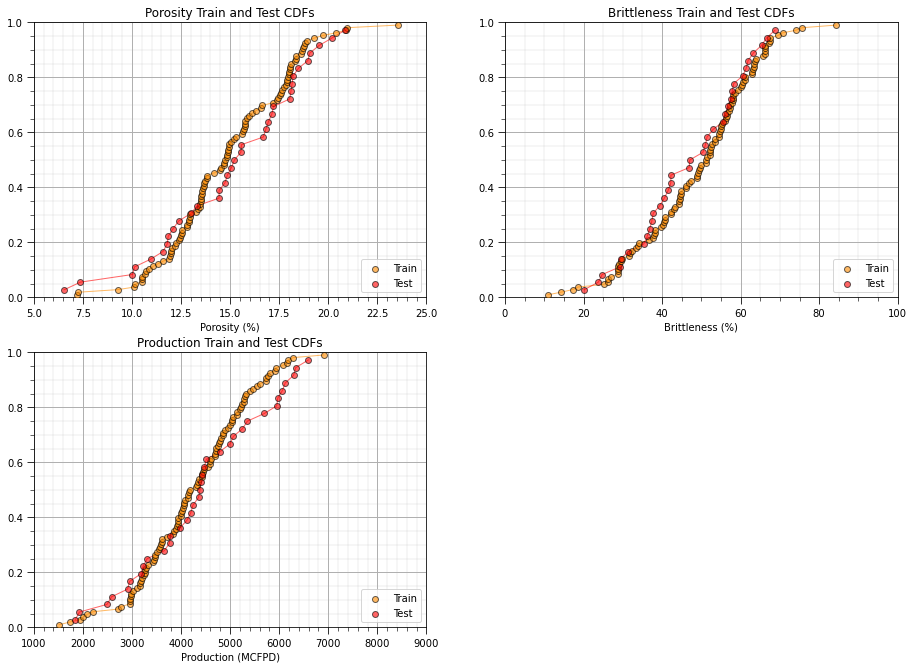

In [11]:
plt.subplot(221)                                              # predictor feature #1 CDF
plot_CDF(X_train[Xname[0]],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[0]],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[0]); plt.xlim(Xmin[0],Xmax[0]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[0] + ' Train and Test CDFs')

plt.subplot(222)                                              # predictor feature #2 CDF
plot_CDF(X_train[Xname[1]],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[1]],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[1]); plt.xlim(Xmin[1],Xmax[1]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[1] + ' Train and Test CDFs')

plt.subplot(223)                                              # response feature CDF
plot_CDF(y_train[yname],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(y_test[yname],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(ylabelunit); plt.xlim(ymin,ymax); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(ylabel + ' Train and Test CDFs')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Once again, the distributions are well behaved, 

* we cannot observe obvious gaps nor truncations.
* check coverage of the train and test data

Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

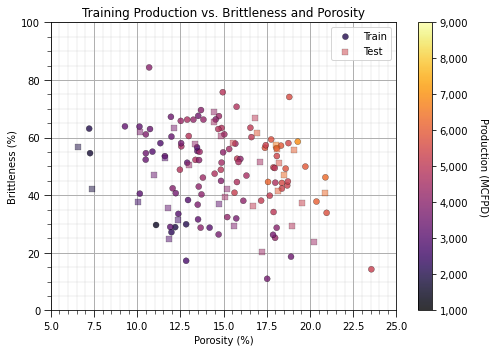

In [12]:
plt.subplot(111)                                              # visualize the train and test data in predictor feature space
im = plt.scatter(X_train[Xname[0]],X_train[Xname[1]],s=None, c=y_train[yname], marker='o', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.8, linewidths=0.3, edgecolors="black", label = 'Train')
plt.scatter(X_test[Xname[0]],X_test[Xname[1]],s=None, c=y_test[yname], marker='s', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.5, linewidths=0.3, edgecolors="black", label = 'Test')
plt.title('Training ' + ylabel + ' vs. ' + Xlabel[1] + ' and ' + Xlabel[0]); 
plt.xlabel(Xlabel[0] + ' (' + Xunit[0] + ')'); plt.ylabel(Xlabel[1] + ' (' + Xunit[1] + ')')
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); plt.legend(loc = 'upper right'); add_grid()
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(ylabel + ' (' + yunit + ')', rotation=270, labelpad=20)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

This problem looks complicated and could not be modeled with simple linear regression. It appears that there are non-linearities. Let's use a simple nonparametric model, decision tree.

#### Instantiate, Fit and Predict with scikit-learn

Let's build our predictive machine learning model, by instantiate, fit and predict with scikit-learn.

* **instantiate** the model object with the hyperparameters, k-nearest neighbours 
* **fit** by training the model with the training data, we use the member function fit 
* **predict** with the trained model. After fit is run, predict is available to make predictions

#### Training a Decision Tree (Regression Tree)

Now we are ready to run the DecisionTreeRegressor command to build our regression tree to predict our response feature given our 2 predictor features (recall we limit ourselves here to 2 predictor features for ease of visualization).  

* We will use our two functions defined above to visualize the decision tree prediction over the feature space and the cross plot of actual and estimated production for the training data along with three model metrics from the sklearn.metric module.

**Hyper Parameters** - we constrain our tree complexity with:

* *max_leaf_nodes* - maximum number of regions, also called terminal or lead nodes in the decision tree
* *max_depth* - maximum number of levels, e.g., max_depth = 1 is a stump tree with only 1 decision and two regions
* *min_samples_leaf* - minimum number of data in a new region, good constraint to ensure each region has enough data to make a reasonable estimate

For now lets just try out some hyperparameters.

##### Underfit Decision Tree Model

Let's use too few regions, set max_leaf_nodes too small and see the resulting decision tree model.

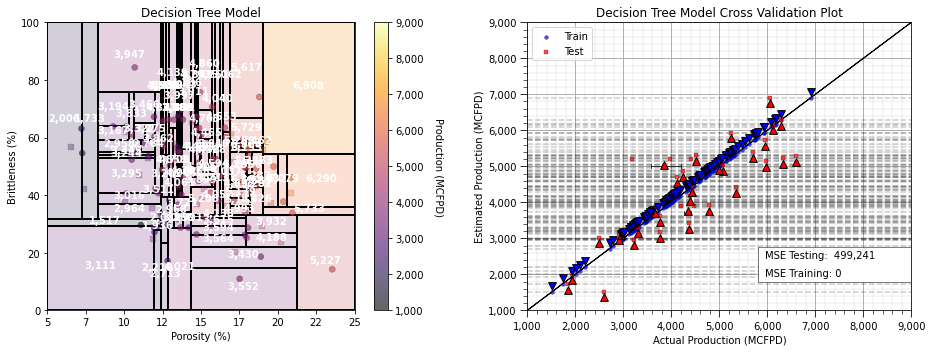

In [16]:
max_leaf_nodes = 140; max_depth =99; min_samples_leaf = 1      # hyperparameters

tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,max_depth = max_depth,min_samples_leaf = min_samples_leaf)
tree_model = tree_model.fit(X_train.values, y_train.values)

plt.subplot(121)                                              # visualize, data, and decision tree regions and predictions
visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model',Xname,yname,Xlabelunit,ylabelunit) 
    
plt.subplot(122)                                              # cross validation with conditional statistics plot
check_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot',)
        
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.25, hspace=0.2); plt.show()

This model is very much underfit, it is too simple to fit the shape of the prediction problem. Here's some more information on the plot.

See the horizontal lines on the plot of estimated vs. actual production (plot on the bottom)? 

* That is expected as the regression tree estimates with the average of the data in each region of the feature space (terminal node). 

* To further assess the model performance, I have included the actual response P10, mean and P90 for each leaf node, region for both training and testing.

* underfit predictive machine learning models have poor accuracy and training and testing.

If we have a more complicated tree with more terminal nodes then there would be more lines. 

##### Overfit Decision Tree Model

Let's use too many regions, set max_leaf_nodes too large and see the resulting decision tree model.

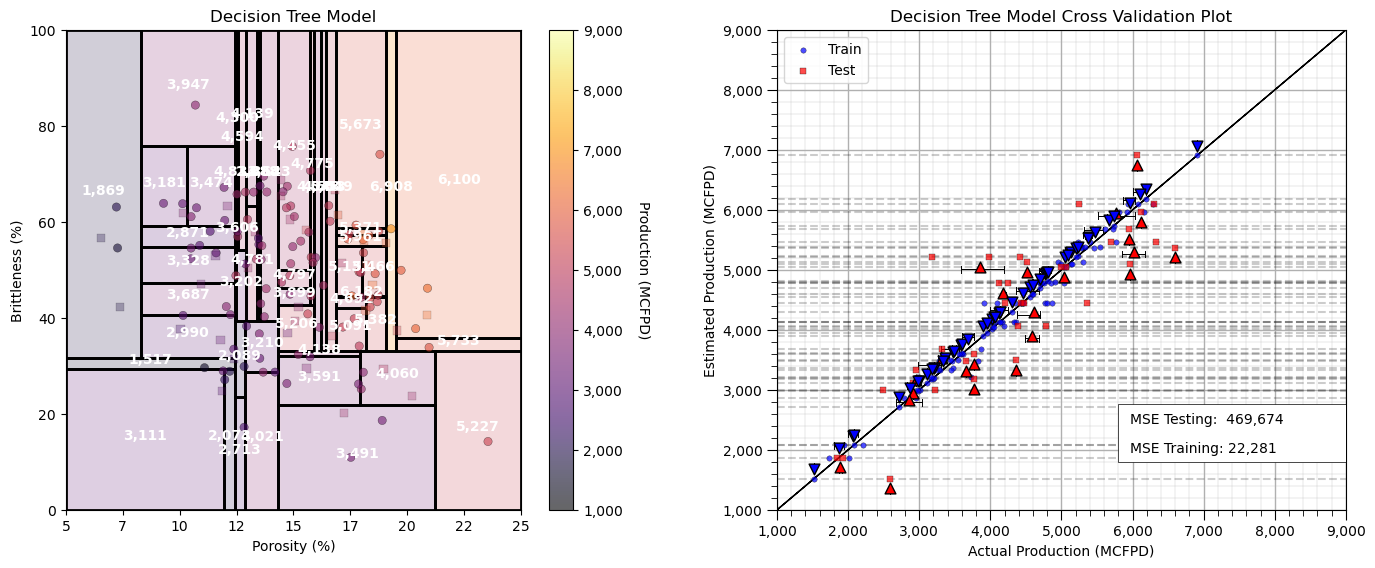

In [30]:
max_leaf_nodes = 50; max_depth = 9; min_samples_leaf = 1     # hyperparameters

tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,max_depth = max_depth,min_samples_leaf = min_samples_leaf)
tree_model = tree_model.fit(X_train.values, y_train.values)

plt.subplot(121)                                              # visualize, data, and decision tree regions and predictions
visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model',Xname,yname,Xlabelunit,ylabelunit) 
    
plt.subplot(122)                                              # cross validation with conditional statistics plot
check_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot',)
        
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.25, hspace=0.2); plt.show()

Now we have an overfit predictive machine learning model.

* too much complexity and flexibility
* we are fitting the noise in the data
* good accuracy in training, but poor accuracy in testing

It is instructive to observe the decision tree model over the feature space as we incrementally add terminal nodes. We can graphically observe the hierarchical binary splitting quite clearly. 

* Let's visualize from simple complicated models.

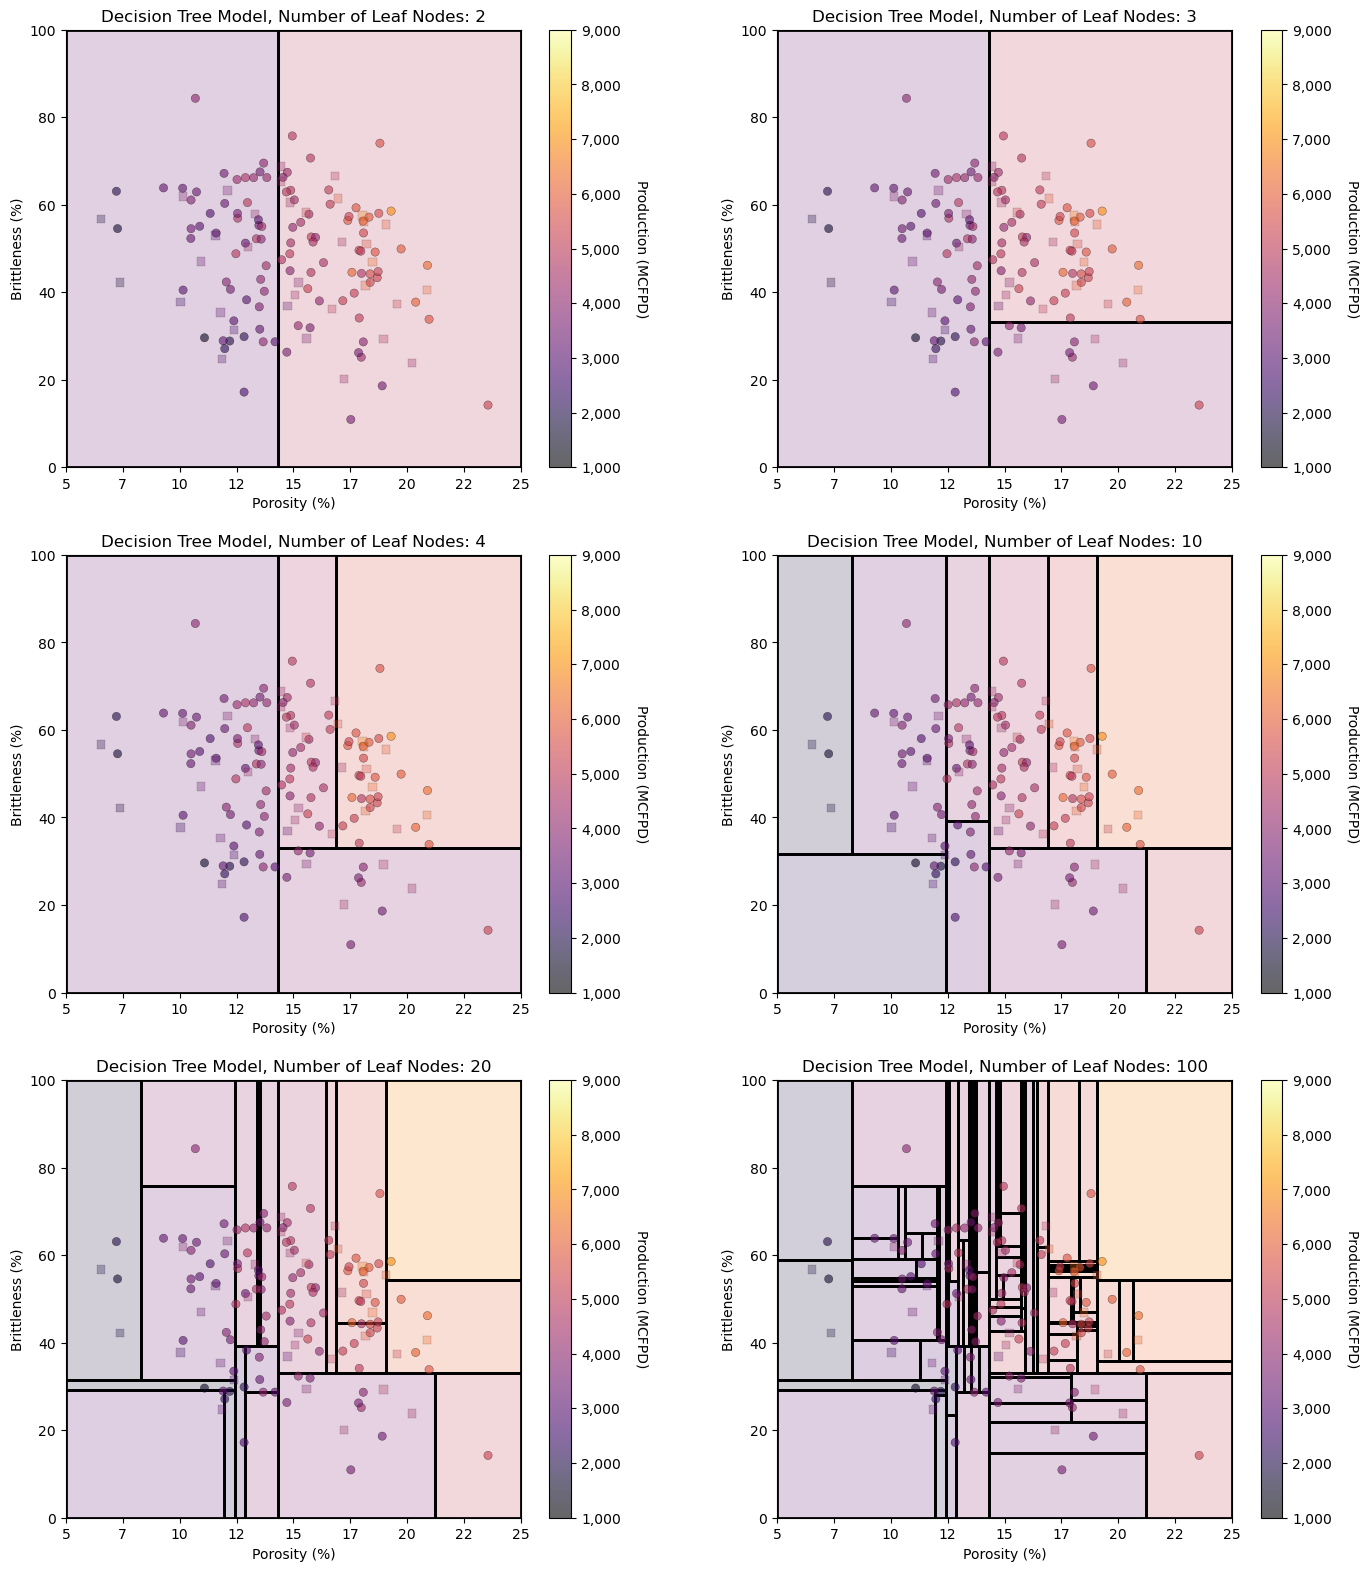

In [32]:
leaf_nodes_list = [2,3,4,10,20,100]

for inode,leaf_nodes in enumerate(leaf_nodes_list):

    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes)
    tree_model = tree_model.fit(X_train.values, y_train.values)

    plt.subplot(3,2,inode+1)                                         # visualize, data, and decision tree regions and predictions
    visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],1000,9000,'Decision Tree Model, Number of Leaf Nodes: ' + str(leaf_nodes),Xname,yname,Xlabelunit,ylabelunit,annotate=False)   

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.1, wspace=0.25, hspace=0.2); plt.show()

It may be useful to look at a decision tree model and the associated decision tree, side-by-side.

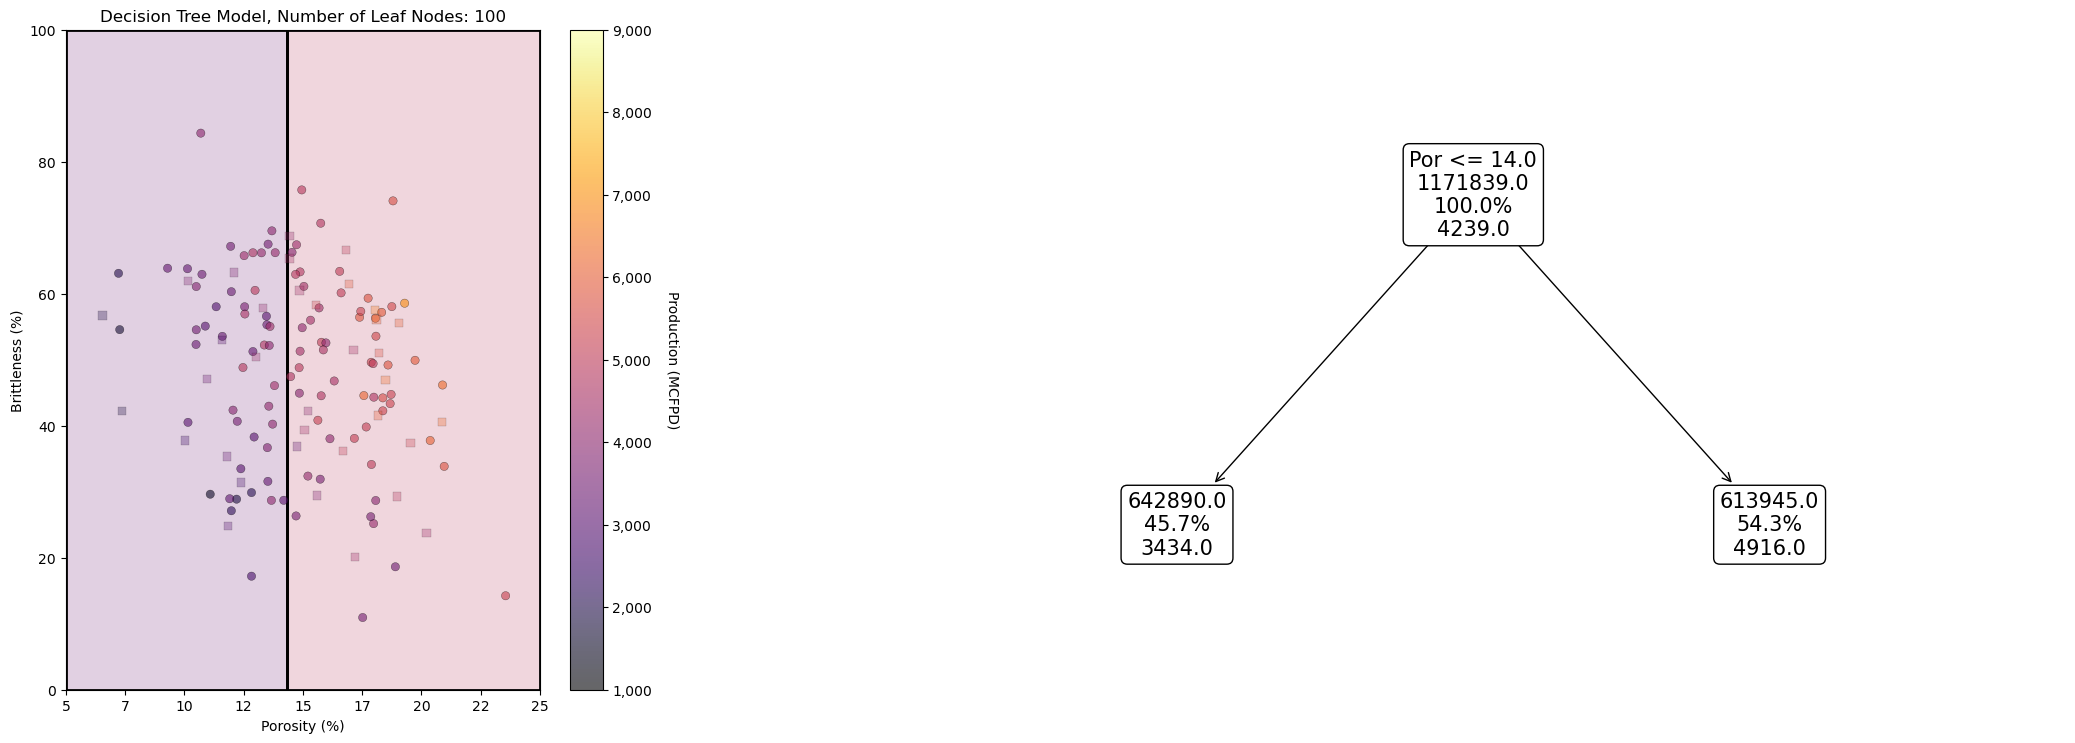

In [34]:
leaf_nodes_viz = 2

tree_model_viz = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes_viz).fit(X_train.values, y_train.values)

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])  # 1 row, 3 columns with 1:2 width ratio

ax1 = fig.add_subplot(gs[0])                         # visualize, data, and decision tree regions and predictions                                      
visualize_tree_model(tree_model_viz,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],1000,9000,'Decision Tree Model, Number of Leaf Nodes: ' + str(leaf_nodes),Xname,yname,
        Xlabelunit,ylabelunit,annotate=False)   

ax2 = fig.add_subplot(gs[1:])                                  # visualize, data, and decision tree regions and predictions
_ = tree.plot_tree(tree_model_viz,ax = ax2,feature_names=list(Xname),class_names=list(yname),filled=False,label='none',rounded=True,precision=0,
                  proportion=True,max_depth=4,fontsize=15)

plt.tight_layout()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.25, hspace=0.2); plt.show()

How do we find the best hyperparameters, for the best complexity for optimum prediction accuracy for testing? That is hyperparameter tuning.

#### Tuning a Decision Tree (Regression Tree)

Let's perform hyperparameter tuning. To do this we,

1. See the range of possible hyperparameter values.
2. Loop over the range of possible hyperparameter values.
   * Train on the training data with the current hyperparameter values.
   * Predict at the testing data
   * Summarize the error over all the testing data
3. Select the hyperparameters that minimize the error at for the testing data

When I teach this to my students, I suggest that this is a model dress rehearsal. We add value by making predictions for cases not used to train the model. We want the model that performs best for cases not in the training, so we are simulating real world use of the model!

Now let's do hyperparameter tuning 'by-hand', by varying the decision tree complexity and find the complexity that minimizes MSE in testing
* for simplicity the code below loops only over the maximum leaf nodes hyperparameter
* we set minimum number of samples to 1, and maximum depth to 9 to ensure that these hyperparameters will not have any impact (we set them to very complicated so they don't limit the model complexity)

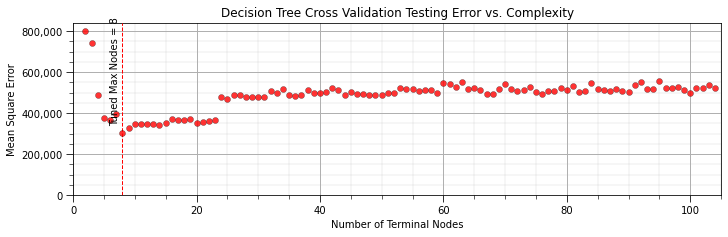

In [17]:
trees = []; MSE_CV = []; node_CV = []

inode = 2
while inode < len(X_train):                                   # loop over the hyperparameter, train with training and test with testing
    tree_model = tree.DecisionTreeRegressor(min_samples_leaf=1,max_leaf_nodes=inode).fit(X_train.values, y_train.values)
    trees.append(tree_model)
    predict_train = tree_model.predict(np.c_[X_test[Xname[0]],X_test[Xname[1]]]) 
    MSE_CV.append(metrics.mean_squared_error(y_test[yname],predict_train))   
    all_nodes = tree_model.tree_.node_count             
    decision_nodes = len([x for x in tree_model.tree_.feature if x != _tree.TREE_UNDEFINED]); terminal_nodes = all_nodes - decision_nodes
    node_CV.append(terminal_nodes); inode+=1

plt.subplot(111)
plt.scatter(node_CV,MSE_CV,s=None,c='red',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.8,linewidths=0.3,
            edgecolors="black",zorder=20)
tuned_node = node_CV[np.argmin(MSE_CV)]; max_MSE_CV = np.max(MSE_CV)
plt.vlines(tuned_node,0,1.05*max_MSE_CV,lw=1.0,ls='--',color='red',zorder=10)
plt.annotate('Tuned Max Nodes = ' + str(tuned_node),(tuned_node-2,3.5e5),rotation=90,zorder=30)
plt.title('Decision Tree Cross Validation Testing Error vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); plt.ylabel('Mean Square Error')
plt.xlim(0,len(X_train)); plt.ylim(0,1.05*max_MSE_CV); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.6, wspace=0.2, hspace=0.2); plt.show()

It is useful to evaluate the performance of our tree by observing the accuracy vs. complexity, with a minimum due to the model variance and model bias trade-off. 

For a more robust result, let's try k-fold cross validation. sklearn has a built in cross validation method called cross_val_score that we can use to:

1. Apply k-fold approach with iterative separation of training and testing data
2. With k=5, we have 20% withheld for testing for each fold
3. Automate the model construction, looping over folds and averaging the metric of interest

Let's try it out on our trees with variable number of terminal nodes.  Note the cross validation is set to use 4 processors, but still will likely take a couple of minutes to run.

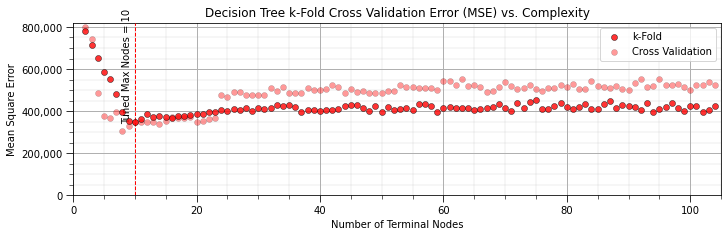

In [18]:
MSE_kF = []; node_kF = []                                     # k-fold iteration code modified from StackOverFlow by Dimosthenis

inode = 2
while inode < len(X_train):
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=inode).fit(X_train.values, y_train.values)
    scores = cross_val_score(estimator=tree_model, X= np.c_[df[Xname[0]],df[Xname[1]]],y=df[yname], cv=5, n_jobs=4,
        scoring = "neg_mean_squared_error")                   # perform 4-fold cross validation
    MSE_kF.append(abs(scores.mean()))
    all_nodes = tree_model.tree_.node_count   
    decision_nodes = len([x for x in tree_model.tree_.feature if x != _tree.TREE_UNDEFINED]); terminal_nodes = all_nodes - decision_nodes
    node_kF.append(terminal_nodes); inode+=1

tuned_node_kF = node_kF[np.argmin(MSE_kF)]; max_MSE_kF = np.max(MSE_kF)  
plt.subplot(111)
plt.vlines(tuned_node_kF,0,1.05*max_MSE_kF,lw=1.0,ls='--',color='red',zorder=10)
plt.annotate('Tuned Max Nodes = ' + str(tuned_node_kF),(tuned_node_kF-2,3.5e5),rotation=90,zorder=30)
plt.scatter(node_kF,MSE_kF,s=None,c="red",marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.8,
            linewidths=0.5, edgecolors="black",zorder=40,label='k-Fold')
plt.scatter(node_CV,MSE_CV,s=None,c='red',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.4,linewidths=0.3,
            edgecolors="black",zorder=20,label='Cross Validation')
plt.title('Decision Tree k-Fold Cross Validation Error (MSE) vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); 
plt.ylabel('Mean Square Error'); plt.xlim(0,len(X_train)); plt.ylim(0,1.05*max_MSE_kF); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.6, wspace=0.2, hspace=0.2); plt.show()

The k-fold cross validation provides a smoother plot of MSE vs. the hyperparameter.

* this is accomplished by averaging the MSE over all the folds to reduce sensitivity of the metric to specific assignment of training and testing data

* all our train and test cross validation or k-fold cross validation was to get this one value, the model **hyperparameter**  

#### Build the Final Model

Now let's take that hyperparameter and train on all the data, this is our **final model**

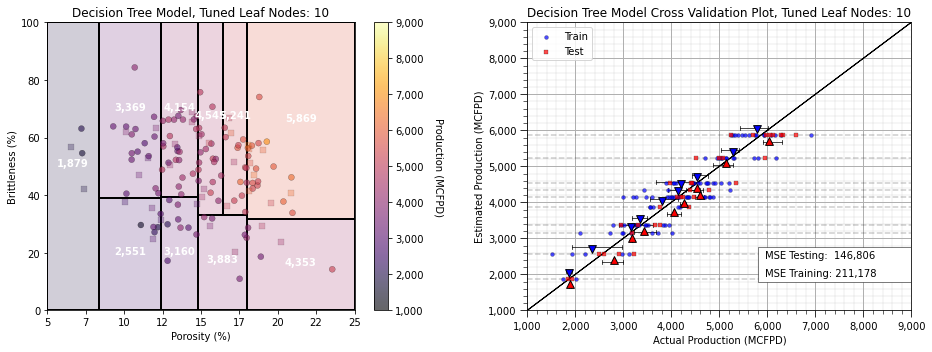

In [19]:
pruned_tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=tuned_node_kF)
pruned_tree_model = pruned_tree_model.fit(X, y)               # re-train

plt.subplot(121)                                              # visualize, data, and decision tree regions and predictions
visualize_tree_model(pruned_tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model, Tuned Leaf Nodes: ' + str(tuned_node_kF),Xname,yname,
                    Xlabelunit,ylabelunit) # plots the data points and the decision tree prediction 
    
plt.subplot(122)                                              # cross validation with conditional statistics plot
check_tree_model(pruned_tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot, Tuned Leaf Nodes: ' + 
                    str(tuned_node_kF),)
       
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.25, hspace=0.2); plt.show()

We have completed our predictive machine learning model. Now let's cover a couple more decision tree diagnostics. 

#### Interrogating Decision Trees

It may be useful to evaluate for any possible feature combination, the order of decision nodes that resulted in the specific prediction.  The following function provides the list of nodes that the prediction cases passes.

In [42]:
x1 = 7.0; x2 = 10.0                                          # the predictor feature values for the decision path

decision_path = pruned_tree_model.decision_path(np.c_[x1,x2])
print(decision_path)

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 13)	1


#### Extracting the Decision Tree Prediction Model as a Function

Furthermore it may be useful to convert the decision tree to code, a nested set of 'if' statements.  

* This creates a portable model that could be copied and applied as a standalone function.  

Also, one could conveniently interrogate the code version of the tree.  

* We use the previously defined function to do this with our pruned tree.

In [44]:
tree_to_code(pruned_tree_model, list(Xname))                  # convert a decision tree to Python code, nested if statements

def tree(Por, Brittle):
  if Por <= 14.789999961853027:
    if Por <= 12.425000190734863:
      if Por <= 8.335000038146973:
        return [[1879.19091537]]
      elif Por > 8.335000038146973
        if Brittle <= 39.125:
          return [[2551.00021508]]
        elif Brittle > 39.125
          return [[3369.12903299]]
    elif Por > 12.425000190734863
      if Brittle <= 39.26500129699707:
        return [[3160.11022857]]
      elif Brittle > 39.26500129699707
        return [[4154.18334527]]
  elif Por > 14.789999961853027
    if Por <= 18.015000343322754:
      if Brittle <= 33.25:
        return [[3883.19381758]]
      elif Brittle > 33.25
        if Por <= 16.434999465942383:
          return [[4544.69777089]]
        elif Por > 16.434999465942383
          return [[5240.84146117]]
    elif Por > 18.015000343322754
      if Brittle <= 31.5600004196167:
        return [[4353.11874206]]
      elif Brittle > 31.5600004196167
        return [[5868.56369869]]


#### Decision Tree-based Feature Importance

Feature importance is calculated from a decision trees by summarizing the reduction in mean square error through inclusion of each feature and is summarized as:

$$
FI(x) = \sum_{t \in T_f} \frac{N_t}{N} \Delta_{MSE_t}
$$

where $T_f$ are all nodes with feature $x$ as the split, $N_t$ is the number of training samples reaching node $t$, $N$ is the total number of samples in the dataset and $\Delta_{MSE_t}$ is the reduction in MSE with the $t$ split.

Note, feature importance can be calculated in a similar manner to MSE above for the case of classification trees with **Gini Impurity**. 

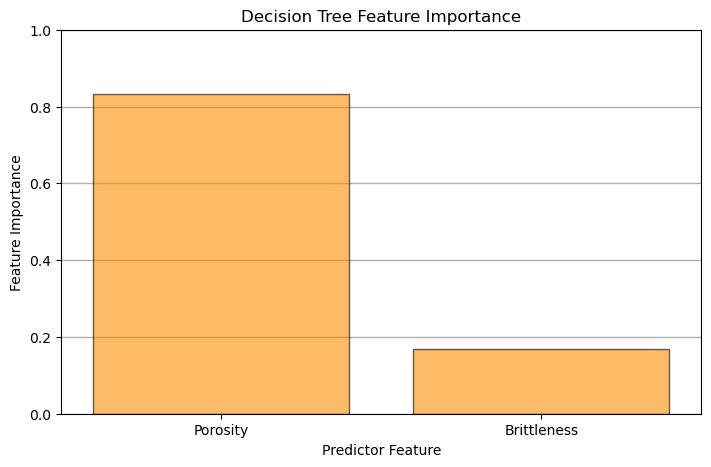

In [46]:
plt.subplot(111)                                              # plot the feature importance 
plt.title("Decision Tree Feature Importance")
plt.bar(Xlabel, pruned_tree_model.feature_importances_,edgecolor = 'black',
       color="darkorange",alpha = 0.6, align="center")
plt.xlim([-0.5,len(Xname)-0.5]); plt.ylim([0.,1.0])
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.xlabel('Predictor Feature'); plt.ylabel('Feature Importance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=0.8, wspace=0.2, hspace=0.5); plt.show()

#### Visualize the Model

Let's take a last look at the graphical representation of our pruned tree.  

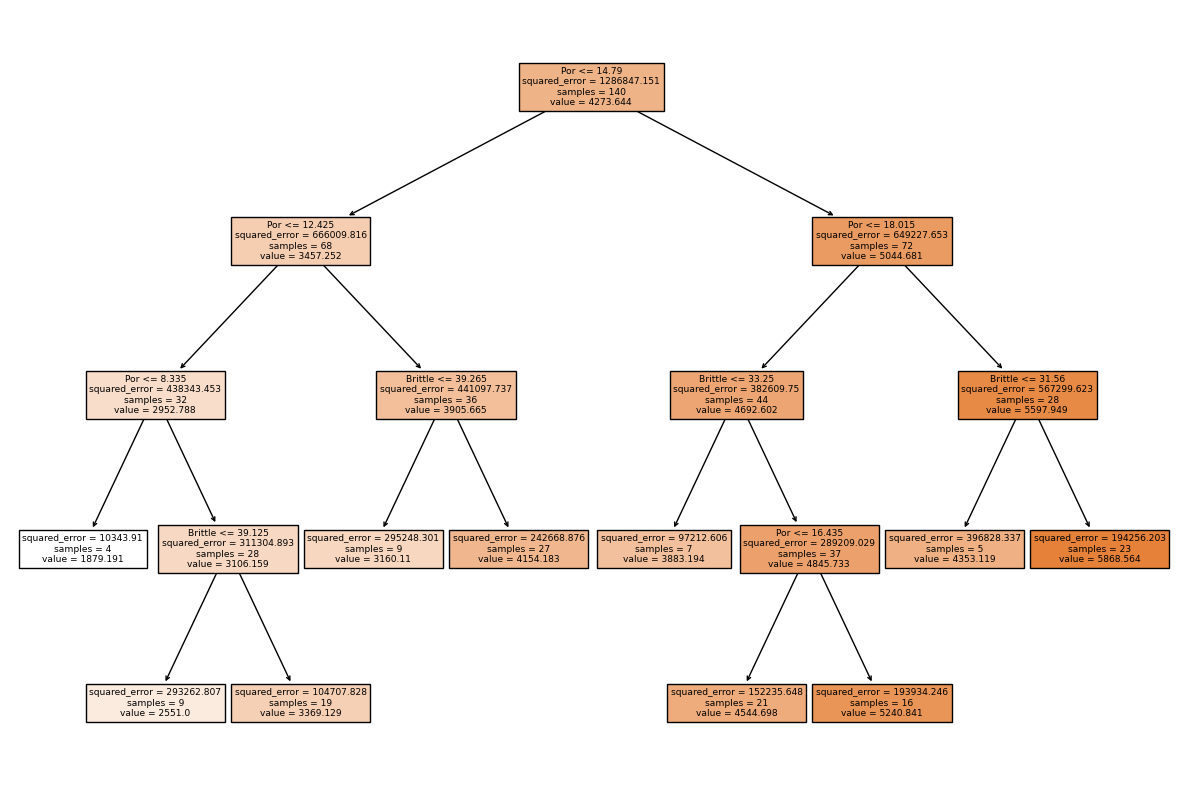

In [48]:
fig = plt.figure(figsize=(15,10))

_ = tree.plot_tree(pruned_tree_model,                         # plot the decision tree for model visualization
                   feature_names=list(Xname),  
                   class_names=list(yname),
                   filled=True)

#### Simple Code to Make a Decision Tree Machine and Calculate a Prediction

To support those just getting started, here's a minimal amount of code to:

* load the scikit-learn package for decision trees
* load data
* instantiate a decision tree with hyperparameters (no tuning is shown)
* train the decision tree with the training data
* make a prediction with the decision tree

In [50]:
from sklearn import tree                                      # import decision tree from scikit-learn
Xname = ['Por','Brittle']; yname='Production'                 # predictor features and response feature
x1 = 0.25; x2 = 0.3                                           # predictor values for the prediction
my_data = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load subsurface data table
my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=26)       # instantiate tree with hyperparameters
my_tree = my_tree.fit(X.values,y.values)                      # train tree with training data
estimate = my_tree.predict([[x1,x2]])[0]                      # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + str(round(estimate,1)) + ' ' + yunit) # print results

Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 1879.2 MCFPD


#### Machine Learning Pipelines for Clean, Compact Machine Learning Code

Pipelines are a scikit-learn class that allows for the encapsulation of a sequence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* build complete workflows with very few lines of readable code 

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible


The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

For more information see my recorded lecture on [Machine Learning Pipelines](https://www.youtube.com/watch?v=tYrPs8s1l9U&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=5) and a well-documented demonstration [Machine Learning Pipeline Workflow](http://localhost:8892/notebooks/OneDrive%20-%20The%20University%20of%20Texas%20at%20Austin/Courses/Workflows/PythonDataBasics_Pipelines.ipynb).

In [52]:
pipe_tree = Pipeline([                                        # the machine learning workflow as a pipeline object

    ('tree', tree.DecisionTreeRegressor())
])

params = {                                                    # the machine learning workflow method's parameters to search
    'tree__max_leaf_nodes': np.arange(2,len(X),1,dtype = int),
}

KF_tuned_tree = GridSearchCV(pipe_tree,params,scoring = 'neg_mean_squared_error', # hyperparameter tuning w. grid search k-fold cross validation 
                             cv=KFold(n_splits=5,shuffle=False),refit = True)
KF_tuned_tree.fit(X,y)                                        # tune and train the model

print('Tuned hyperparameter: max_leaf_nodes = ' + str(KF_tuned_tree.best_params_))

estimate = KF_tuned_tree.predict([[x1,x2]])[0]                # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + str(round(estimate,1)) + ' ' + yunit) # print results

Tuned hyperparameter: max_leaf_nodes = {'tree__max_leaf_nodes': 10}
Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 1879.2 MCFPD


#### Practice on a New Dataset

Ok, time to get to work. Let's load up a dataset and build a decision tree prediction model with,

* compact code

* basic visaulizations

* save the output

You can select any of these datasets or modify the code and add your own to do this.

##### Dataset 0, Unconventional Multivariate v4

Let's load the provided multivariate, dataset [unconv_MV.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV_v4.csv). This dataset has variables from 1,000 unconventional wells including:

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* acoustic impedance (kg/m^3 x m/s x 10^6)
* brittleness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).

##### Dataset 2, Reservoir 21

Let's load the provided multivariate, 3D spatial dataset [res21_wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/res21_wells.csv). This dataset has variables from 73 vertical wells over a 10,000m x 10,000m x 50 m reservoir unit:

* well (ID)
* X (m), Y (m), Depth (m) location coordinates
* Porosity (%) after units conversion
* Permeability (mD)
* Acoustic Impedance (kg/m2s*10^6) after units conversion
* Facies (categorical) - ordinal with ordering from Shale, Sandy Shale, Shaley Sand, to Sandstone.
* Density (g/cm^3)
* Compressible velocity (m/s)
* Youngs modulus (GPa)
* Shear velocity (m/s)
* Shear modulus (GPa)
* 3 year cumulative oil production (Mbbl)

We load the tabular data with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

* we also populate lists with data ranges and labels for ease of plotting

Load and format the data,

* drop the response feature
* reformate the features as needed
* also, I like to store the metadata in lists

In [20]:
idata = 2                                                    # select the dataset

if idata == 0:
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['Well'],axis=1,inplace=True)                 # remove well index and response feature

    features = df_new.columns.values.tolist()                 # store the names of the features

    xname = features[:-1]
    yname = [features[-1]]
       
    xmin_new = [6.0,0.0,1.0,10.0,0.0,0.9]; xmax_new = [24.0,10.0,5.0,85.0,2.2,2.9] # set the minimum and maximum values for plotting
    ymin_new = 0.0; ymax_new = 10000.0
    xlabel_new = ['Porosity (%)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Brittleness Ratio (%)', # set the names for plotting
             'Total Organic Carbon (%)','Vitrinite Reflectance (%)']

    ylabel_new = 'Production (MCFPD)'
    
    xtitle_new = ['Porosity','Permeability','Acoustic Impedance','Brittleness Ratio', # set the units for plotting
             'Total Organic Carbon','Vitrinite Reflectance']

    ytitle_new = 'Production'

    y = pd.DataFrame(df_new[yname])                              # extract selected features as X and y DataFrames  
    X = df_new[xname]

elif idata == 1:
    names = {'Porosity':'Por'}
    
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['X','Y','Unnamed: 0','Facies'],axis=1,inplace=True)   # remove response feature
    df_new = df_new.rename(columns=names)
    df_new['Por'] = df_new['Por'] * 100.0; df_new['AI'] = df_new['AI'] / 1000.0
    features = df_new.columns.values.tolist()                 # store the names of the features

    xname = features[:-1]
    yname = [features[-1]]
    
    xmin_new = [4.0,0.0]; xmax_new = [19.0,500.0] # set the minimum and maximum values for plotting

    ymin_new = 1.60; ymax_new = 6.20
    
    xlabel_new = ['Porosity (fraction)','Permeability (mD)'] # set the names for plotting

    ylabel_new = 'Acoustic Impedance (kg/m2s*10^6)'
    
    xtitle_new = ['Porosity','Permeability']

    ytitle_new = 'Acoustic Impedance (kg/m2s*10^6)'

    y = pd.DataFrame(df_new[yname])                              # extract selected features as X and y DataFrames  
    X = df_new[xname]

elif idata == 2:  
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/res21_2D_wells.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['Well_ID','X','Y'],axis=1,inplace=True) # remove Well Index, X and Y coordinates, and response feature
    df_new = df_new.dropna(how='any',inplace=False)
     
    features = df_new.columns.values.tolist()                 # store the names of the features

    xname = features[:-1]
    yname = [features[-1]]
    
    xmin_new = [1,0.0,0.0,4.0,0.0,6.5,1.4,1600.0,10.0,1300.0,1.6]; xmax_new = [73,10000.0,10000.0,19.0,500.0,8.3,3.6,6200.0,50.0,2000.0,12.0] # set the minimum and maximum values for plotting

    ymin_new = 0.0; ymax_new = 1600.0
    
    xlabel_new = ['Well (ID)','X (m)','Y (m)','Depth (m)','Porosity (fraction)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Facies (categorical)',
              'Density (g/cm^3)','Compressible velocity (m/s)','Youngs modulus (GPa)', 'Shear velocity (m/s)', 'Shear modulus (GPa)'] # set the names for plotting

    ylabel_new = 'Production (Mbbl)'
    
    xtitle_new = ['Well','X','Y','Depth','Porosity','Permeability','Acoustic Impedance','Facies',
              'Density','Compressible velocity','Youngs modulus', 'Shear velocity', 'Shear modulus']

    ytitle_new = 'Production'

    y = pd.DataFrame(df_new[yname])                              # extract selected features as X and y DataFrames  
    X = df_new[xname]

df_new.head(n=13)

,Por,Perm,AI,Density,PVel,Youngs,SVel,Shear,CumulativeOil
1,12.907730,133.910637,7.308846,2.146360,3563.549461,25.688560,1673.770439,6.429229,1201.20
7,12.647965,114.359667,7.343836,2.188597,3570.094553,25.444064,1670.043495,6.100984,683.92
10,12.998469,129.332122,7.282051,2.131121,3524.448615,25.985734,1681.960101,6.203527,978.14
15,12.426141,123.227677,7.351795,2.203026,3417.596818,25.976462,1675.355860,6.288040,608.09
16,13.507371,147.562087,7.300360,2.210916,3476.167397,24.817767,1656.890690,6.222528,1062.10
36,13.309477,122.818961,7.345220,2.178749,3346.347661,25.436579,1651.679529,6.334308,539.98
49,11.822910,98.168307,7.386212,2.301552,3250.020705,24.340656,1662.438742,6.617267,1095.30
51,13.986616,132.575456,7.194749,2.108986,3415.255945,26.253236,1712.017629,5.583251,805.49
61,14.735895,128.201000,7.172693,1.841786,3886.950307,28.289950,1672.370150,5.044439,1146.00


##### Build and Check Model

We apply the follow steps,

1. specify the K-fold method
2. loop over number of leaf nodes, instantiate, fit and record the error
3. plot the test error vs. number of leaf nodes, select the hyperparameter that minimizes test error
4. retrain the model with the tuned hyperparameter and all of the data

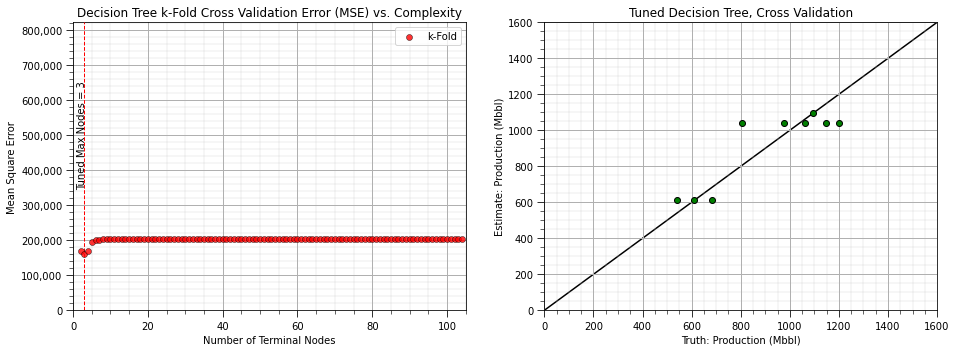

In [21]:
MSE_kF = []; node_kF = []                                     
kf = KFold(n_splits=5, shuffle=True, random_state=seed)       # k-fold specification     

inode = 2
while inode < len(X_train):
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=inode,random_state=seed)
    scores = cross_val_score(estimator=tree_model,X=X,y=y,cv=kf,n_jobs=4,scoring = "neg_mean_squared_error") # perform 5-fold cross validation
    MSE_kF.append(abs(scores.mean()))
    node_kF.append(inode); inode+=1

tuned_node_kF = node_kF[np.argmin(MSE_kF)]
tuned_tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=tuned_node_kF).fit(X.values, y.values) # retrain on all the data

plt.subplot(121)
plt.vlines(tuned_node_kF,0,1.05*max_MSE_kF,lw=1.0,ls='--',color='red',zorder=10)
plt.annotate('Tuned Max Nodes = ' + str(tuned_node_kF),(tuned_node_kF-2,3.5e5),rotation=90,zorder=30)
plt.scatter(node_kF,MSE_kF,s=None,c="red",marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.8,
            linewidths=0.5, edgecolors="black",zorder=40,label='k-Fold')
plt.title('Decision Tree k-Fold Cross Validation Error (MSE) vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); 
plt.ylabel('Mean Square Error'); plt.xlim(0,len(X_train)); plt.ylim(0,1.05*max_MSE_kF); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.legend(loc='upper right')

y_hat = tuned_tree_model.predict(X)

plt.subplot(122)
plt.scatter(y,y_hat,color='green',edgecolor='black') # cross validation plot
plt.plot([ymin_new,ymax_new],[ymin_new,ymax_new],color='black',zorder=-1)
plt.xlim(ymin_new,ymax_new); plt.ylim(ymin_new,ymax_new); add_grid() 
plt.xlabel('Truth: ' + ylabel_new); plt.ylabel('Estimate: ' + ylabel_new)
plt.title('Tuned Decision Tree, Cross Validation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic treatment of decision tree. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)